### **A Post-Affirmative Action College Admissions Model** 
*Liam Bieber, Trey Whitehead, & Sophie O'Melia* \\

**Primary Objectives:** \\
  (1) Design an automated model for a hypothetical college admissions system in which a prospective student's race, ethnicity, gender, sexual orientation, and age cannot be taken into consideration. \\

  (2) Create an array of simulated applicants and track them through the process. \\

  (3) Produce plots to represent the information. 

**Implemented Datasets:** 

  (1) College Board: https://reports.collegeboard.org/media/pdf/2022-total-group-sat-suite-of-assessments-annual-report.pdf \\

  (2) SAT scores by race: https://nces.ed.gov/programs/digest/d07/tables/dt07_134.asp \\

  (3) SAT by race, gender, etc. 2017-2021: https://nces.ed.gov/programs/digest/d21/tables/dt21_226.10.asp?current=yes \\

  (4) Another link for reference: https://nces.ed.gov/programs/digest/d21/tables/dt21_226.50.asp?current=yes \\




## Post-Affirmative Action College Admission Model

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Initialize the generic rating system
rating = [0,0.25,0.5,0.75,1]

# Identify the size of the applicant pool 
# We chose its value to be Harvard's 2023 applicant pool population. 
applicants = 61621

In [ ]:
# Assign probabilitistic weight for every attribute taken into consideration
# All probabilities must sum to 1
# All probabilities are weighted based on primary research of each factor's importance to college admission. (see paper)
gpa_weight = 0.2
testscore_weight = 0.1
geographic_weight = 0.15
extracurricular_weight = 0.15
personal_essays = .15
interview_weight = 0.1
legacy_weight = 0.15

In [ ]:
# Create weight vector
weight_vector = [testscore_weight, gpa_weight, geographic_weight, extracurricular_weight, personal_essays, interview_weight, legacy_weight]

# Initialize the matrix for the applicant pool
applicant_pool = np.zeros([applicants,len(weight_vector)])

# Create vector that will store applicants race (corresponds by index with applicant in applicant pool)
races = []

In [ ]:
def income_generator():
  income = 0
  # income types are 'low', 'low-mid', 'mid', 'up-mid', 'up' by quntile. Reported by the College Board, breakdown is as follows:
  # Low: $0-$51,591, Low-Mid: $51,592-$67,083, Mid: $67,084-$83,766, Up-Mid: $83,767-$110,244 Up: $110,245+
  income_types = [0,1,2,3,4]

  # income probabilities are derived from College Board reported statistics. Broke down into test takers by quintile.
  income_probabilities = [.123, .143, .163, .222, .349]

  # the following process follows a probabilisitc method of assigning income quntile based on the above probabilities
  sim = random.random()
  total = income_probabilities[0]
  for i in range(len(income_types)):
    if sim < total:
      income = income_types[i]
      break
    else:
      if i != len(income_types) - 1:
        total += income_probabilities[i+1]
      else:
        income = income_types[len(income_types) - 1]
  return int(income)

In [ ]:
def race_generator(income):
  # We are going to proabalistically assign race based off of our calculations using consensus data & Harvard applicant data
  # See paper for more info of breakdown of income quintile race demographics
  # 2D array defined below is a list of different income quintiles, and per qunitile a breakdown
  # into the following demographics, respectively: White, Black, American Indian, Asian, Pacific Islander,
  # Hispanic
  races = ['White', 'Black', 'American Indian', 'Asian', 'Pacific Islander', 'Hispanic']

  # race percent breakdown for each qunitile
  quintile_breakdowns = [[.5078, .1702, .0171, .0522, .0036, .249],
   [.5604, .1515, .014, .0474, .0034, .2233],
    [.6692, .1186, .0113, .0626, .0026, .1357],
     [.7072, .0811, .0089, .0883, .0018, .1127],
      [.7164, .0822, .0047, .1032, .0022, .0913]]

  # pulled from https://college.harvard.edu/admissions/admissions-statistics
  # percentage of Harvard applicants from each ethnicity
  application_demographics = [.406, .152, .029, .279, 0.008, .126]

  # calculating sum of proportions of race across all quintiles; to be used later
  col_sums = np.zeros(6)
  for j in range(len(quintile_breakdowns[0])):
    for i in range(len(quintile_breakdowns)):
      col_sums[j] += quintile_breakdowns[i][j]

  # array of use
  effective_breakdowns = np.zeros((5, 6))

  # finding the effective race % as a function of applicant % by race and quintile race distribution
  # Equation: % of race in income quintile / sum of effective weight of race across all qunintiles * 5 quintiles * correct applicant race %
  # Intuition: % of race in income quintile / sum of effective weight of race across all qunintiles: relative weight of that quintile for the race
  # Relative weight of that quintile for the race * 5 qunintiles: scaled to standardize
  # ... * correct applicant %: Takes standardized consensus data across quintiles and scales to correct race weight for harvard applicants 
  for i in range(len(quintile_breakdowns)):
    for j in range(len(quintile_breakdowns[0])):
      effective_breakdowns[i][j] = quintile_breakdowns[i][j]/col_sums[j]*application_demographics[j]*5
  breakdown = effective_breakdowns[income]
  
  # probabalistic assignment of race based off of our quintile's effective breakdown using an aggregate of US Consensus Data & Harvard Admissions Data
  sim = random.random()
  total = breakdown[0]
  for i in range(len(races)):
    if sim < total:
      race = races[i]
      break
    else:
      if i != len(breakdown) - 1:
        total += breakdown[i+1]
      else:
        race = races[len(breakdown) - 1]
  return race

In [ ]:
def deviation(std_dev):
  deviation_off_mean = 0
  # 50/50 chance of being above or below the mean
  sign = 0
  if random.random() > 0.5:
    sign = 1
  else:
    sign = -1
  prob = random.random()
  # Let's make use of the fact that SAT scores are normally distributed
  # Use the 68-95-99.7 rule
  if prob < .68:
    deviation_off_mean = sign * random.random()
  elif prob < .95:
    deviation_off_mean = sign * (1 + random.random())
  else:
    deviation_off_mean = sign * (2 + random.random())
  deviation = deviation_off_mean * std_dev
  return deviation_off_mean

In [ ]:
def score_generator(income):
  test_score = 0
  # Average scores by income quintile, as reported by College Board
  average_scores = [914, 965, 1007, 1059, 1161]
  # Our 'Harvard Scaling Factor' is determined by taking the mean applicant SAT (1510), and finding the
  # factor that makes our median quintile score reflect this mean.
  harvard_scaling_factor = 1.5
  applicant_average_scores = np.zeros(5)
  for i in range(len(average_scores)):
    applicant_average_scores[i] = harvard_scaling_factor * average_scores[i]
  # estimate derived from percentiles given from Harvard SAT data
  standard_deviation = 70
  test_score = applicant_average_scores[income] + deviation(standard_deviation)
  if test_score > 1600:
    test_score = 1600
  return test_score

In [ ]:
# Loop through each applicant and build up their characteristics
for i in range(applicants):
  # We define the applicants income, which feeds probabilisticly into their different statistics, namely Standardized Test Scores, which feeds other academic indicators
  income = income_generator()

  # probablistically determining (and storing) applicant's race based off income
  races.append(race_generator(income))

  # loop to iterate through each characteristic for the applicant
  for j in range(len(weight_vector)):
    # Handle test scores first
    if j == 0:
      # generate SAT score based off income (see appropriate helper functions above)
      test_score = score_generator(income)
      test_rating = 0
      # Determining test rating from a standardized [0, .25, .5, .75, 1] scale based off Harvard Standards
      if test_score < 1350:
        test_rating = rating[0]
      elif test_score < 1430:
        test_rating = rating[1]
      elif test_score < 1500:
        test_rating = rating[2]
      elif test_score < 1560:
        test_rating = rating[3]
      else:
        test_rating = rating[4]
      # add the test score to this applicant's attributes
      applicant_pool[i][j] = test_rating * float(weight_vector[j])
    # handle GPA
    elif j == 1:
      grade_rating = 0
      # Let's take advantage of the fact that GPA and standardized test scores often go hand-in-hand
      # But: let's add a slight variation factor
      grade_variance = random.uniform(-.1,.1)
      grade_rating = applicant_pool[i][j-1] + grade_variance
      if grade_rating > 1:
        grade_rating = 1
      elif grade_rating < 0:
        grade_rating = 0
      applicant_pool[i][j] = grade_rating * float(weight_vector[j])
    # true randomization of geographic. See paper for more info.
    elif j == 2:
      applicant_pool[i][j] = random.choice(rating) * float(weight_vector[j])
    # extracurriculars
    elif j == 3:
      # let's treat extracurriculars as independent of academic strength (as there are many cases where
      # a student is very smart but does not contribute in school, or is extremely involved in school
      # but is not the best in the classroom).
      extra_rating = 0
      extra_prob = random.random()
      # Extracurricular distribution likely follows a similar distribution as academic performance, but with less candidates meeting
      # the necessary threshold, but more candidates being at the top rating.
      if extra_prob < .3:
        extra_rating = rating[0]
      elif extra_prob < .4:
        extra_rating = rating[1]
      elif extra_prob < .5:
        extra_rating = rating[2]
      elif extra_prob < .8:
        extra_rating = rating[3]
      else:
        extra_rating = rating[4]
      applicant_pool[i][j] = extra_rating * float(weight_vector[j])
    # handles personal essays
    elif j == 4:
      essay_rating = 0
      essay_prob = random.random()
      # For personal essays, there is the chance that the story told is so good that it carries a large weight.
      # Larger proportion of these essays are in the good, but not exceptional tier.
      if essay_prob < .15:
        essay_rating = rating[0]
      elif essay_prob < .3:
        essay_rating = rating[1]
      elif essay_prob < .6:
        essay_rating = rating[2]
      elif essay_prob < .9:
        essay_rating = rating[3]
      elif essay_prob < .96:
        essay_rating = rating[4]
      else:
        essay_rating = 2
      applicant_pool[i][j] = essay_rating * float(weight_vector[j])
    elif j == 5:
      # Different choices of interview weights: can be overwhelmingly positive, about neutral, or slightly negative.
      # This factors in inherent strength of candidate to warrant an interview in the first place
      # NOTE: the multiple 0's in the array adjust for the probability that a candidate does not receive an interview at all,
      # in which case their admissions profile is affected akin to a true neutral interview
      interview_weights = [-.5,0,0,0,.5,1]
      applicant_pool[i][j] = interview_weights[int(random.random() * 6)] * float(weight_vector[j])
    else:
      # legacy is either no (neutral), yes (but not a big donor), or huge yes (huge donor)
      legacy_weights = [0, .75, 3]
      option = 0
      legacy_prob = random.random()
      # estimated 2/1000 candidates have a high donating legacy parent
      if legacy_prob > .998:
        option = legacy_weights[2]
      elif legacy_prob > .9:
        option = legacy_weights[1]
      else:
        option = legacy_weights[0]
      applicant_pool[i][j] = option * float(weight_vector[j])

In [ ]:
# Initialize strength vector; calculates the strength of all candidates by summing their attributes
strength_vector = np.sum(applicant_pool,axis=1)

For a cutoff value of 0.595: 

STATS PRE-OFFER ACCEPTANCE/DECLINE
Admitted students: 1996
Denied students: 59625
Acceptance Rate: 3.24% 

STATS POST-OFFER ACCEPTANCE/DECLINE
Attending students: 1787
Declining students: 59834
Approximate yield rate: 90.0%
Actual yield rate: 89.53% 



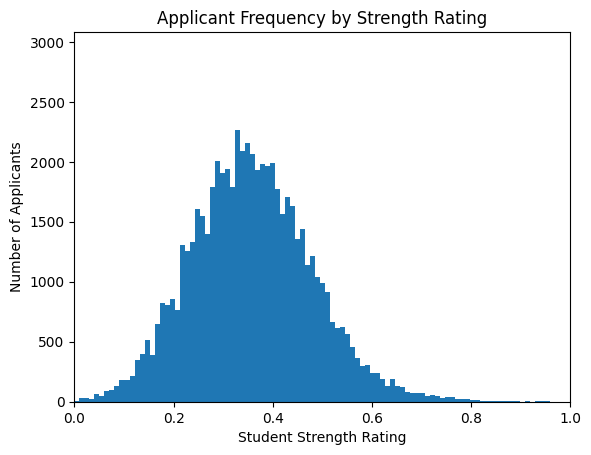

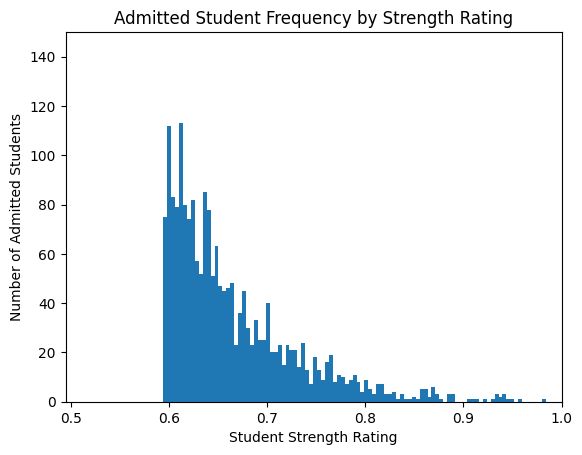

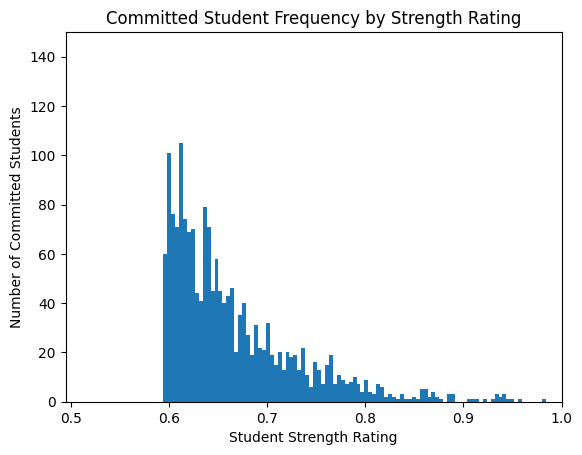

In [ ]:
# Initialize a vector that holds the ratings of all admitted students
# This defines each applican't rating (see histogram)
admitted_vector = []

races_accepted = []

# Initialize a vector that holds the ratings of all committed students
# This defines each applicant's rating (see histogram)
committed_vector = []

races_committed = []

def predictor(cutoff):
  # Initialize primary student pools
  admitted_students = 0
  denied_students = 0

  # Initialize secondary student pools
  committed_students = 0
  dropped_students = 0

  # Determine which students are admitted and which are denied
  for i in range(len(strength_vector)):
    if strength_vector[i] > (cutoff / 10):
      admitted_students += 1
      admitted_vector.append(strength_vector[i])
      races_accepted.append(races[i])
    else: 
      denied_students += 1
  
  dropped_students = denied_students

  # Determine acceptance rate
  acceptance_rate = round(100 * (admitted_students / applicants), 2)

  print('For a cutoff value of ' + str((cutoff / 10)) + ': \n')
  print('STATS PRE-OFFER ACCEPTANCE/DECLINE')
  print('Admitted students: ' + str(admitted_students))
  print('Denied students: ' + str(dropped_students))
  print('Acceptance Rate: '+ str(acceptance_rate) + '% \n')

  # Estimated probability that an accepted student decides to attend
  # parameterize?
  attendance_likelihood = 0.9

  # For a random student, there is a roughly X% chance that they turn down their offer of admission
  # Our model accounts for the acceptance of a waitlisted student accordingly
  for i in range(len(admitted_vector)):
    # Factoring in randomization of student's chance of accepting or denying offer of admission 
    decision = random.random()
    if decision > 1 - attendance_likelihood:
      committed_students += 1
      committed_vector.append(admitted_vector[i])
      races_committed.append(races_accepted[i])
    else:
      dropped_students += 1

  # Determine actual yield rate
  yield_rate = round(100 * (committed_students / admitted_students), 2)

  print('STATS POST-OFFER ACCEPTANCE/DECLINE')
  print('Attending students: ' + str(committed_students))
  print('Declining students: ' + str(dropped_students))
  print('Approximate yield rate: '+ str(100 * attendance_likelihood) + '%')
  print('Actual yield rate: '+ str(yield_rate) + '% \n')

  xdim = cutoff / 10 - 0.1
  ydim = 150

  # Plot histogram for applicants
  plt.hist(strength_vector, bins=np.linspace(0,1,100))
  plt.title('Applicant Frequency by Strength Rating')
  plt.xlim(0, 1)
  plt.ylim(0, len(strength_vector) / 20)
  plt.xlabel("Student Strength Rating")
  plt.ylabel("Number of Applicants")
  plt.show()

  # Plot histogram for admitted students
  plt.hist(admitted_vector, bins=np.linspace(0,1,250))
  plt.title('Admitted Student Frequency by Strength Rating')
  plt.xlim(xdim, 1)
  plt.ylim(0, ydim)
  plt.xlabel("Student Strength Rating")
  plt.ylabel("Number of Admitted Students")
  plt.show()

  # Plot histogram for committed students
  plt.hist(committed_vector, bins=np.linspace(0,1,250))
  plt.title('Committed Student Frequency by Strength Rating')
  plt.xlim(xdim, 1)
  plt.ylim(0, ydim) 
  plt.xlabel("Student Strength Rating")
  plt.ylabel("Number of Committed Students")
  plt.show()

predictor(5.95)

In [ ]:
def race_counter(list):
  white = 0
  black = 0
  american_indian = 0
  asian = 0
  pacific_islander = 0
  hispanic = 0

  for race in list:
    if race == 'White':
      white += 1
    elif race == 'Black':
      black += 1
    elif race == 'American Indian':
      american_indian += 1
    elif race == 'Asian':
      asian += 1
    elif race == 'Pacific Islander':
      pacific_islander += 1
    else:
      hispanic += 1
  return [white, black, american_indian, asian, pacific_islander, hispanic]

Accepted Student Ethnic Breakdown: 
White: 42.234%
Black: 11.373%
American Indian: 2.204%
Asian: 35.371%
Pacific Islander: 0.701%
Hispanic: 8.116%


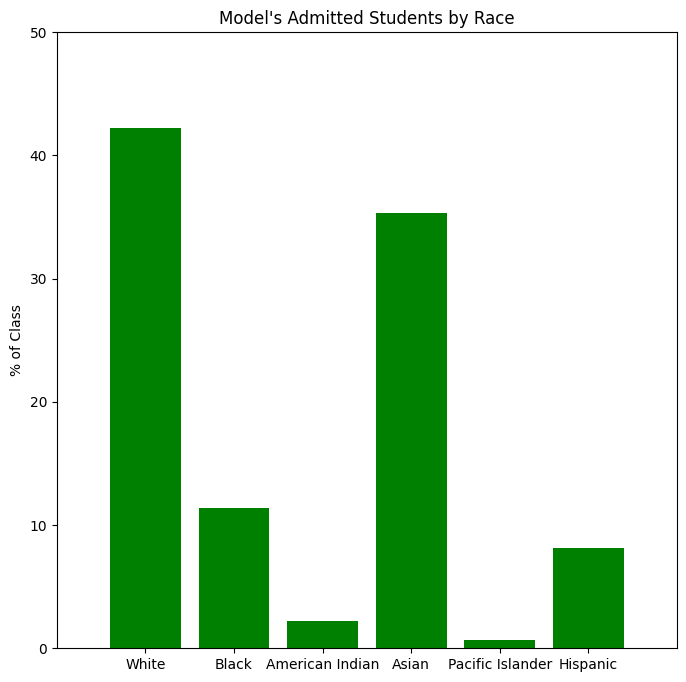

In [ ]:
accepted_by_race = race_counter(races_accepted)
x_students = (100 * (accepted_by_race / np.sum(accepted_by_race))).round(3)

print("Accepted Student Ethnic Breakdown: ")
print("White: " + str(x_students[0]) + '%')
print("Black: " + str(x_students[1]) + '%')
print("American Indian: " + str(x_students[2]) + '%')
print("Asian: " + str(x_students[3]) + '%')
print("Pacific Islander: " + str(x_students[4]) + '%')
print("Hispanic: " + str(x_students[5]) + '%')

race_type = ['White', 'Black', 'American Indian', 'Asian', 'Pacific Islander', 'Hispanic']

xdim = 6
ydim = 50
y_pos = np.arange(len(race_type))

plt.figure(figsize=(8,8))
plt.bar(range(0,6,1), x_students, color = 'green')
plt.title('Model\'s Admitted Students by Race')
plt.ylabel('% of Class')
plt.xlim(-1, xdim)
plt.ylim(0, ydim) 
plt.xticks(y_pos, race_type)
plt.show()

Committed Students Ethnic Breakdown: 
White: 42.473%
Black: 11.304%
American Indian: 2.126%
Asian: 35.422%
Pacific Islander: 0.616%
Hispanic: 8.058%


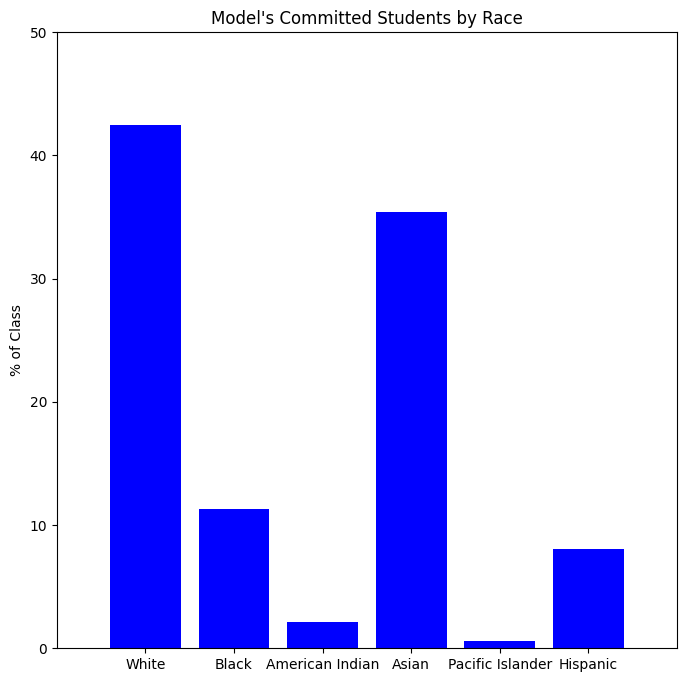

In [ ]:
committed_by_race = race_counter(races_committed)
x_students = (100 * (committed_by_race / np.sum(committed_by_race))).round(3)

print("Committed Students Ethnic Breakdown: ")
print("White: " + str(x_students[0]) + '%')
print("Black: " + str(x_students[1]) + '%')
print("American Indian: " + str(x_students[2]) + '%')
print("Asian: " + str(x_students[3]) + '%')
print("Pacific Islander: " + str(x_students[4]) + '%')
print("Hispanic: " + str(x_students[5]) + '%')

race_type = ['White', 'Black', 'American Indian', 'Asian', 'Pacific Islander', 'Hispanic']

xdim = 6
ydim = 50
y_pos = np.arange(len(race_type))

plt.figure(figsize=(8,8))
plt.bar(range(0,6,1), x_students, color = 'blue')
plt.title('Model\'s Committed Students by Race')
plt.ylabel('% of Class')
plt.xlim(-1, xdim)
plt.ylim(0, ydim) 
plt.xticks(y_pos, race_type)
plt.show()

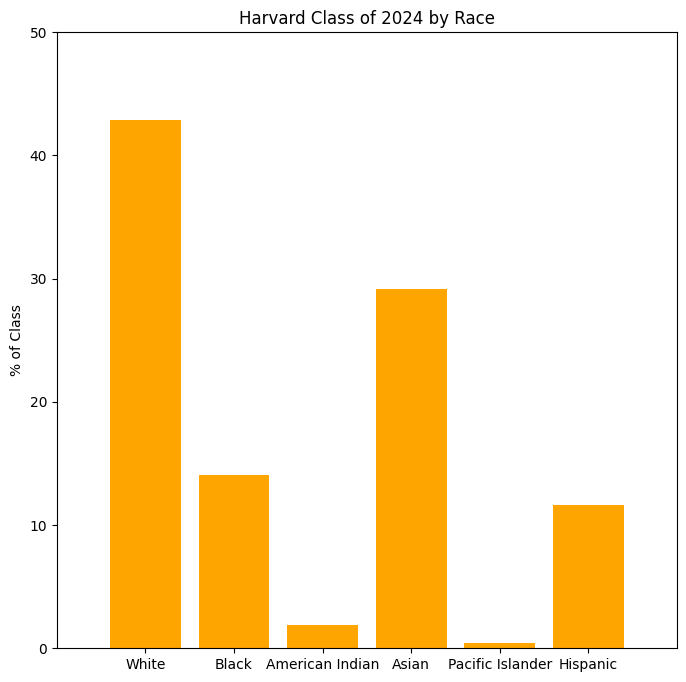

In [ ]:
# Actual Harvard 

# Percentages of Class of 2024 (scaled to adjust back to 100%)
# Pulled from https://features.thecrimson.com/2020/freshman-survey/makeup/
h_w = 42.85
h_b = 14.05
h_ai = 1.85
h_a = 29.2
h_pi = 0.43
h_h = 11.62

h_students = [h_w, h_b, h_ai, h_a, h_pi, h_h]

xdim = 6
ydim = 50
y_pos = np.arange(len(h_students))

plt.figure(figsize=(8,8))
plt.bar(range(0,6,1), h_students, color = 'orange')
plt.title('Harvard Class of 2024 by Race')
plt.ylabel('% of Class')
plt.xlim(-1, xdim)
plt.ylim(0, ydim) 
plt.xticks(y_pos, race_type)
plt.show()

Difference in Model and Actual Committed Students by Ethnicity: 
White: -0.38%
Black: -2.75%
American Indian: 0.28%
Asian: 6.22%
Pacific Islander: 0.19%
Hispanic: -3.56%


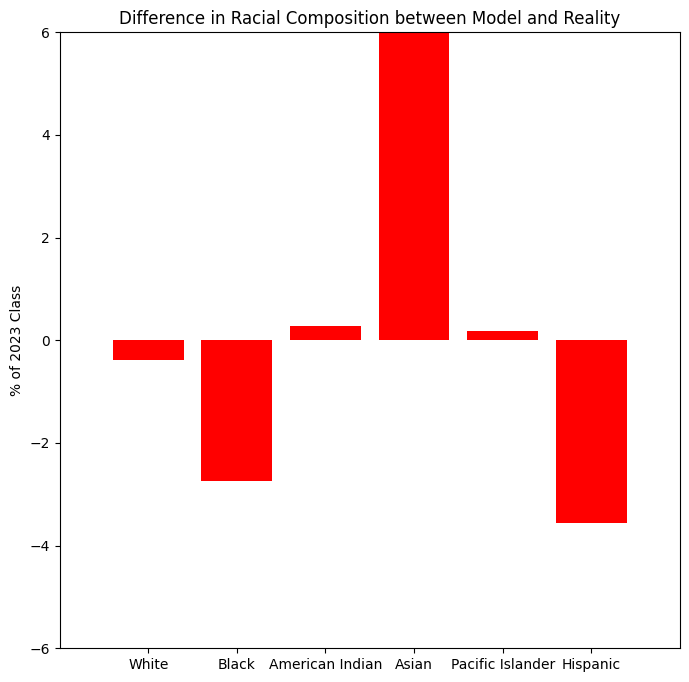

In [ ]:
# Raw Differences

change = x_students - h_students

xdim = 6
y_pos = np.arange(len(change))

print("Difference in Model and Actual Committed Students by Ethnicity: ")
print("White: " + str(round(change[0],2)) + '%')
print("Black: " + str(round(change[1],2)) + '%')
print("American Indian: " + str(round(change[2],2)) + '%')
print("Asian: " + str(round(change[3],2)) + '%')
print("Pacific Islander: " + str(round(change[4],2)) + '%')
print("Hispanic: " + str(round(change[5],2)) + '%')

plt.figure(figsize=(8,8))
plt.bar(range(0,6,1), change, color = 'red')
plt.title('Difference in Racial Composition between Model and Reality')
plt.ylabel('% of 2023 Class')
plt.xlim(-1, xdim)
plt.ylim(-6, 6) 
plt.xticks(y_pos, race_type)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

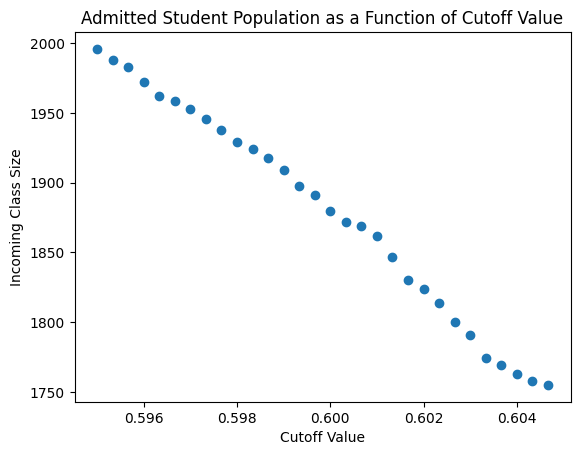

In [ ]:
admitted_students = []
cutoffs = []
studs = 0

for cutoff in range(3*595,3*605,1):
  # Determine which students are admitted and which are denied
  for i in range(len(strength_vector)):
    if strength_vector[i] > (cutoff / 3000):
      studs += 1
  admitted_students.append(studs)
  cutoffs.append(cutoff / 3000)
  studs = 0

plt.scatter(cutoffs,admitted_students)
plt.title('Admitted Student Population as a Function of Cutoff Value')
plt.xlabel("Cutoff Value")
plt.ylabel("Incoming Class Size")
plt.show